# PODS Capstone Report

## **Author:** Ali Lugo
**Date:** December 9, 2024

## **Pre-processing and Data Cleaning**

The dataset was pre-processed to ensure reliability. The following steps were taken:
- **Seeding the Random Generator**: The random number generator was seeded using my **N-number (16745560)** for reproducibility.
- **Loading Datasets**: The numerical (`rmpCapstoneNum.csv`) and qualitative (`rmpCapstoneQual.csv`) datasets were loaded.
- **Cleaning Data**:
  - Renamed columns for clarity.
  - Dropped rows with missing values in **Average Rating**.
  - Set a threshold of **at least 5 ratings per professor** to improve rating reliability.
  - Merged numerical and qualitative datasets into one comprehensive dataset.


In [1]:
"""
Created on Thu Nov 14 14:44:23 2024

@author: alugo
"""

import random 
import numpy as np
import pandas as pd

N_number = 16745560
random.seed(N_number)
np.random.seed(N_number)

In [2]:
rmp_num = pd.read_csv('/Users/alugo/Downloads/rmpCapstoneNum.csv')
rmp_qual= pd.read_csv('/Users/alugo/Downloads/rmpCapstoneQual.csv')

rmp_num.head(), rmp_num.info(), rmp_qual.head(), rmp_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89892 entries, 0 to 89891
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5       70003 non-null  float64
 1   1.5     70003 non-null  float64
 2   2       70003 non-null  float64
 3   0       70003 non-null  float64
 4   NaN     12160 non-null  float64
 5   0.1     70003 non-null  float64
 6   0.2     89892 non-null  int64  
 7   1       89892 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 5.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89892 entries, 0 to 89891
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Criminal Justice         70003 non-null  object
 1   George Mason University  70003 non-null  object
 2   VA                       70003 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


(     5  1.5     2    0   NaN  0.1  0.2  1
 0  NaN  NaN   NaN  NaN   NaN  NaN    0  0
 1  3.2  3.0   4.0  0.0   NaN  0.0    1  0
 2  3.6  3.5  10.0  1.0   NaN  0.0    0  0
 3  1.0  5.0   1.0  0.0   NaN  0.0    0  0
 4  3.5  3.3  22.0  0.0  56.0  7.0    1  0,
 None,
   Criminal Justice        George Mason University   VA
 0              NaN                            NaN  NaN
 1          English       Alabama State University   AL
 2          English         University of Kentucky   KY
 3          English              Keiser University   FL
 4          English  Eastern Florida State College   FL,
 None)

In [3]:
#clean datasets

#rename cols
rmp_num.columns = [
    'Average Rating', 'Average Difficulty', 'Number of Ratings', 'Received Pepper','Proportion Retake',
    'Online Ratings','Male Gender','Female Gender'
    ]
rmp_qual.columns=['Major/Field','University','US State']

#drop rows w missing vals in Average Rating Col
rmp_num_clean = rmp_num.dropna(subset='Average Rating')

#set threshold for reliability of avg rating
threshold = 5
rmp_num_clean = rmp_num_clean[rmp_num_clean['Number of Ratings'] >= threshold] 

#merge num and qual datasets
merge_data = rmp_num_clean.merge(rmp_qual, left_index=True, right_index=True)
merge_data.head()

,Average Rating,Average Difficulty,Number of Ratings,Received Pepper,Proportion Retake,Online Ratings,Male Gender,Female Gender,Major/Field,University,US State
2,3.6,3.5,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,KY
4,3.5,3.3,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,FL
20,2.6,4.1,10.0,0.0,NaN,0.0,1,0,Management,University of Alabama,AL
24,4.3,3.3,16.0,1.0,83.0,0.0,0,1,English,Concordia University,QC
26,4.1,1.8,8.0,0.0,NaN,0.0,0,1,Education,Mount Royal University,AB


## **Research Questions and Findings**

### **1. Is there evidence of a pro-male gender bias in professor ratings?**
- **Methodology**:
  - Separated ratings into **male and female professor groups**.
  - Calculated mean ratings for each group.
  - Performed an **independent t-test** to assess statistical significance.
- **Findings**:
  - Male professors had an **average rating of 3.91**, while female professors had **3.86**.
  - The t-test yielded **t = 4.10, p = 4.12 × 10⁻⁵**, showing a **statistically significant** difference.
  - The **boxplot visualization** confirmed this difference, with male professors having a slightly higher median rating.


average rating for male professors: 3.91
average rating for female professors: 3.86
t-statistic: 4.101356490811084
p-value: 4.124287722038984e-05
There's a statistically significant difference in ratings by gender.


/var/folders/z9/gd2kj3_13tq2_s6ytqlgq2n40000gp/T/ipykernel_34789/103561512.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=['Male'] * len(male_ratings) + ['Female'] * len(female_ratings), y=pd.concat([male_ratings, female_ratings]), palette='Set2')


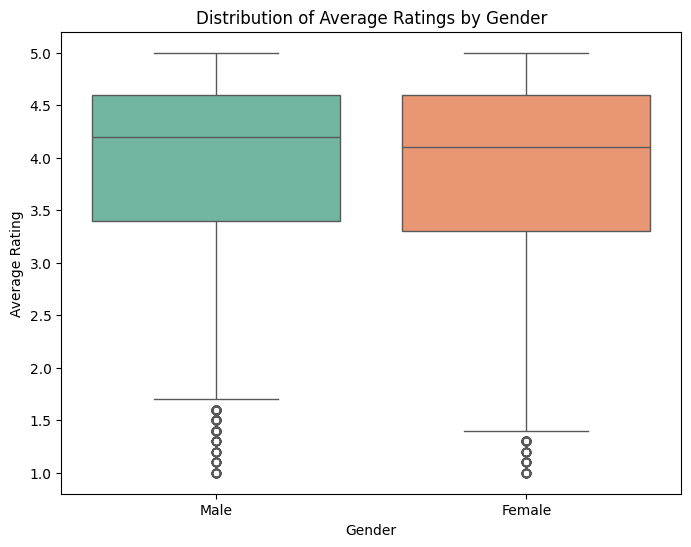

In [7]:
import scipy.stats as stats

#separate data into male and female professors
male_ratings = merge_data[merge_data['Male Gender'] == 1]['Average Rating']
female_ratings = merge_data[merge_data['Female Gender'] == 1]['Average Rating']

#calc means for both
male_mean = round(male_ratings.mean(), 2)
female_mean = round(female_ratings.mean(), 2)

#independent t-test
t_stat, p_value = stats.ttest_ind(male_ratings, female_ratings, nan_policy='omit',equal_var=False)

print(f'average rating for male professors: {male_mean}')
print(f'average rating for female professors: {female_mean}')
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

#check significance at alpha 0.005
if p_value < 0.005:
    print("There's a statistically significant difference in ratings by gender.")
else:
    print("No statistically signficant difference in ratings by gender.")
    
#BOXPLOT to show the distribution of ratings for male and female professors, including medians and variability.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=['Male'] * len(male_ratings) + ['Female'] * len(female_ratings), y=pd.concat([male_ratings, female_ratings]), palette='Set2')
plt.title('Distribution of Average Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

### **2. Does experience impact teaching quality?**
- **Methodology**:
  - Used **Number of Ratings** as a proxy for experience.
  - Conducted a **correlation analysis and linear regression**.
- **Findings**:
  - Weak positive correlation (**0.06**) between number of ratings and average rating.
  - Regression model had an **R² of 0.003** (very low predictive power).
  - The p-value (< 0.005) indicated a **statistically significant but negligible effect**.


Correlation between number of ratings and average rating: 0.06
                            OLS Regression Results                            
Dep. Variable:         Average Rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     85.13
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           3.00e-20
Time:                        18:59:44   Log-Likelihood:                -34568.
No. Observations:               25368   AIC:                         6.914e+04
Df Residuals:                   25366   BIC:                         6.916e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

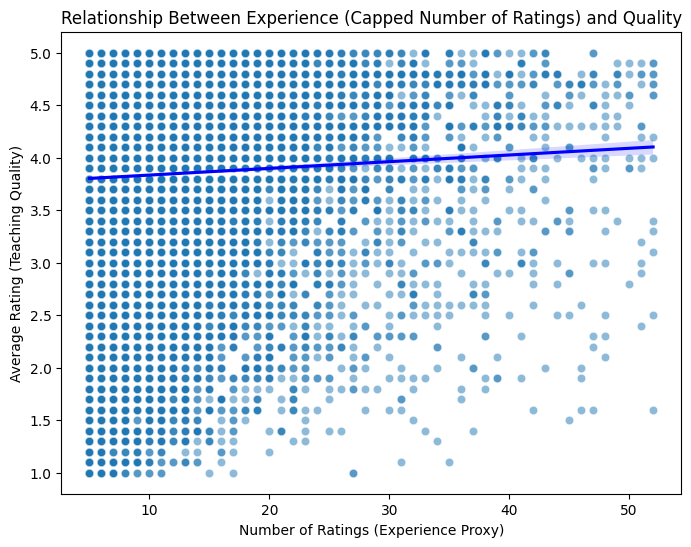

In [9]:
import statsmodels.api as sm

#remove rows w missing vals in Avg Rating and Num of Ratings
data_exp_quality = merge_data.dropna(subset=['Average Rating','Number of Ratings'])

# Cap the number of ratings at the 99th percentile
cap = data_exp_quality["Number of Ratings"].quantile(0.99)
data_capped = data_exp_quality[data_exp_quality["Number of Ratings"] <= cap]

#calc correlation between Num of Ratings and Avg Rating
corr = data_exp_quality['Number of Ratings'].corr(data_exp_quality['Average Rating'])
print(f'Correlation between number of ratings and average rating: {round(corr,2)}')

X = data_exp_quality['Number of Ratings']
y = data_exp_quality['Average Rating']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

p_value1 = model.pvalues['Number of Ratings']
if p_value1 < 0.005:
    print('The number of ratings has a statistically significant effect on the average rating.')
else:
    print('The number of ratings does not have a statistically significant effect on the average rating.')

#scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Number of Ratings", y="Average Rating", data=data_capped, alpha=0.5)
sns.regplot(x="Number of Ratings", y="Average Rating", data=data_capped, scatter=False, color="blue")
plt.title("Relationship Between Experience (Capped Number of Ratings) and Quality")
plt.xlabel("Number of Ratings (Experience Proxy)")
plt.ylabel("Average Rating (Teaching Quality)")
plt.show()

### **3. What is the relationship between Average Rating and Average Difficulty?**
- **Methodology**:
  - Computed **correlation coefficient** and built a **linear regression model**.
- **Findings**:
  - Strong negative correlation (**-0.62**) between **Average Difficulty and Average Rating**.
  - Regression analysis confirmed a **significant negative coefficient (β = -0.72, p < 0.005)**.
  - **R² = 0.39**, meaning **39% of the variance** in ratings is explained by difficulty.
  - **Scatter plot and regression line** showed a clear downward trend.


Correlation between Average Rating and Average Difficulty: -0.62
                            OLS Regression Results                            
Dep. Variable:         Average Rating   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:00:07   Log-Likelihood:                -28481.
No. Observations:               25368   AIC:                         5.697e+04
Df Residuals:                   25366   BIC:                         5.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

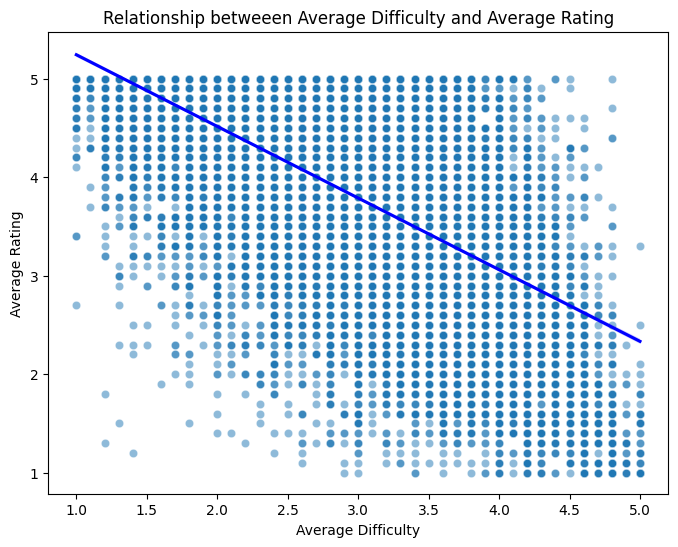

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

rating_difficulty = merge_data.dropna(subset=['Average Rating', 'Average Difficulty'])

#corr between Average rating and Average Difficulty
corr_rating_difficulty = rating_difficulty['Average Rating'].corr(rating_difficulty['Average Difficulty'])
print(f'Correlation between Average Rating and Average Difficulty: {round(corr_rating_difficulty,2)}')

X_1 = rating_difficulty['Average Difficulty']
y_1 = rating_difficulty['Average Rating']

X_1 = sm.add_constant(X_1)

model1 = sm.OLS(y_1, X_1).fit()
print(model1.summary())

plt.figure(figsize=(8,6))
sns.scatterplot(x='Average Difficulty', y='Average Rating', data=rating_difficulty, alpha=0.5)
sns.regplot(x='Average Difficulty', y='Average Rating', data=rating_difficulty, scatter=False, color='blue')
plt.title('Relationship betweeen Average Difficulty and Average Rating')
plt.xlabel('Average Difficulty')
plt.ylabel('Average Rating')
plt.show()

### **4. Do online professors receive higher or lower ratings?**
- **Methodology**:
  - Defined **threshold: 50%+ online classes = "many online classes"**.
  - Conducted **independent t-test** comparing online-heavy vs. in-person professors.
- **Findings**:
  - Online-heavy professors had an **average rating of 3.58**, compared to **3.85** for in-person professors.
  - **T-test: t = -7.43, p < 0.005**, confirming a statistically significant difference.
  - **Boxplot visualization** showed lower ratings for online professors.


Average Rating for teachers teaching many online classes: 3.58
Average Rating for teachers teaching few/no online classes: 3.85
T-statistic: -7.43
P-value: 0.0
There's a statistically significant difference in ratings between the two groups.


/var/folders/z9/gd2kj3_13tq2_s6ytqlgq2n40000gp/T/ipykernel_34789/3196520459.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Average Rating', data=data_online_split, palette='Set2')


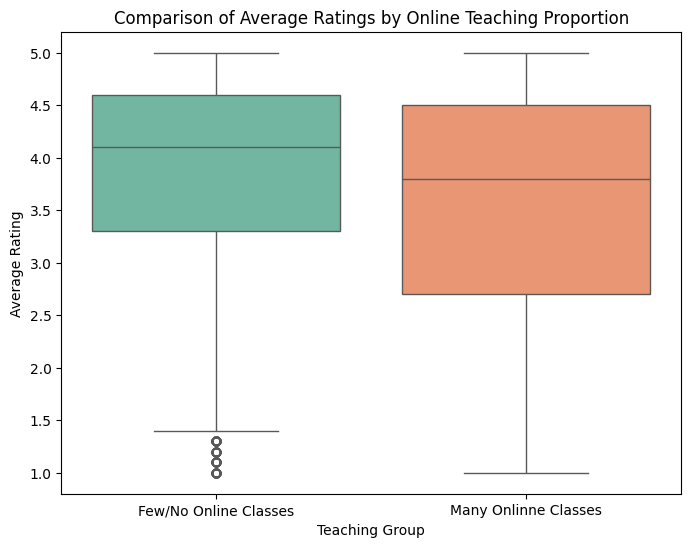

In [11]:
#define a threshold for "a lot of online classes" - 50%?
threshold1 = 0.5
data_online_split = merge_data.dropna(subset=['Online Ratings', 'Number of Ratings','Average Rating'])
data_online_split['Proportion Online'] = data_online_split['Online Ratings'] / data_online_split['Number of Ratings']

#split data into two groups based on threshold
online_teachers = data_online_split[data_online_split['Proportion Online'] > threshold1]
not_online_teachers = data_online_split[data_online_split['Proportion Online'] <= threshold1]

#calc means
online_mean = online_teachers['Average Rating'].mean()
not_online_mean = not_online_teachers['Average Rating'].mean()

#independent t-test
t_stat1, p_val2 = stats.ttest_ind(online_teachers['Average Rating'], not_online_teachers['Average Rating'], nan_policy='omit', equal_var=False)

print(f'Average Rating for teachers teaching many online classes: {round(online_mean,2)}')
print(f'Average Rating for teachers teaching few/no online classes: {round(not_online_mean,2)}')
print(f'T-statistic: {round(t_stat1,2)}')
print(f'P-value: {round(p_val2,2)}')

if p_val2 < 0.005:
    print("There's a statistically significant difference in ratings between the two groups.")
else:    
    print("There is no statistically significant difference in ratings between the two groups.")

#new col to label groups
data_online_split['Group'] = ['Many Onlinne Classes' if x > threshold1 else 'Few/No Online Classes' for x in data_online_split['Proportion Online']]

#boxplot to compare ratings between two groups
plt.figure(figsize=(8,6))
sns.boxplot(x='Group', y='Average Rating', data=data_online_split, palette='Set2')
plt.title('Comparison of Average Ratings by Online Teaching Proportion')
plt.xlabel('Teaching Group')
plt.ylabel('Average Rating')
plt.show()

### **5. Relationship between Average Rating and Proportion Retake?**
- **Methodology**:
  - Conducted **correlation analysis** and built a **linear regression model**.
- **Findings**:
  - **Strong positive correlation (0.88)** between **Average Rating and Proportion Retake**.
  - Regression model confirmed **β = 0.0298, p < 0.005**.
  - **R² = 0.775**, meaning **77.5% of the variance** is explained by retake likelihood.


Correlation between Average Rating and Proportion Retake: 0.88
                            OLS Regression Results                            
Dep. Variable:         Average Rating   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 4.188e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:00:50   Log-Likelihood:                -6153.7
No. Observations:               12160   AIC:                         1.231e+04
Df Residuals:                   12158   BIC:                         1.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

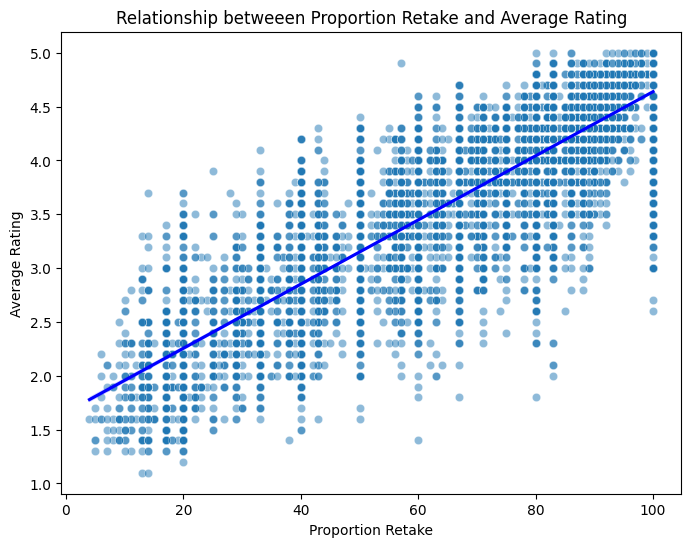

In [12]:
rating_retake = merge_data.dropna(subset=['Average Rating','Proportion Retake'])

#calc correlation between Average Rating and Proportion Retake

corr_rating_retake = rating_retake['Average Rating'].corr(rating_retake['Proportion Retake'])
print(f'Correlation between Average Rating and Proportion Retake: {round(corr_rating_retake,2)}')

X_2 = rating_retake['Proportion Retake']
y_2 = rating_retake['Average Rating']

X_2 = sm.add_constant(X_2)

model_2 = sm.OLS(y_2, X_2).fit()
print(model_2.summary())

plt.figure(figsize=(8,6))
sns.scatterplot(x='Proportion Retake', y='Average Rating', data=rating_retake, alpha=0.5)
sns.regplot(x='Proportion Retake', y='Average Rating', data=rating_retake, scatter=False, color='blue')
plt.title('Relationship betweeen Proportion Retake and Average Rating')
plt.xlabel('Proportion Retake')
plt.ylabel('Average Rating')
plt.show()


### **6. Do 'hot' professors (pepper icon) receive higher ratings?**
- **Methodology**:
  - Conducted an **independent t-test** comparing professors with and without a pepper icon.
- **Findings**:
  - **Hot professors:** **Average rating = 4.36**.
  - **Not-hot professors:** **Average rating = 3.47**.
  - **T-test: t = 90.32, p < 0.0005**, confirming a **statistically significant difference**.
  - **Boxplot visualization** showed "hot" professors consistently received higher ratings.


Average Rating for Hot Teachers: 4.36
Average Rating for Teachers who aren't Hot': 3.47
T-statistic: 90.32
P-value: 0.0
There's a statistically significant difference in ratings between hot and not hot teachers


/var/folders/z9/gd2kj3_13tq2_s6ytqlgq2n40000gp/T/ipykernel_34789/2793520422.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hotness', y='Average Rating', data=merge_data, palette='Set2')


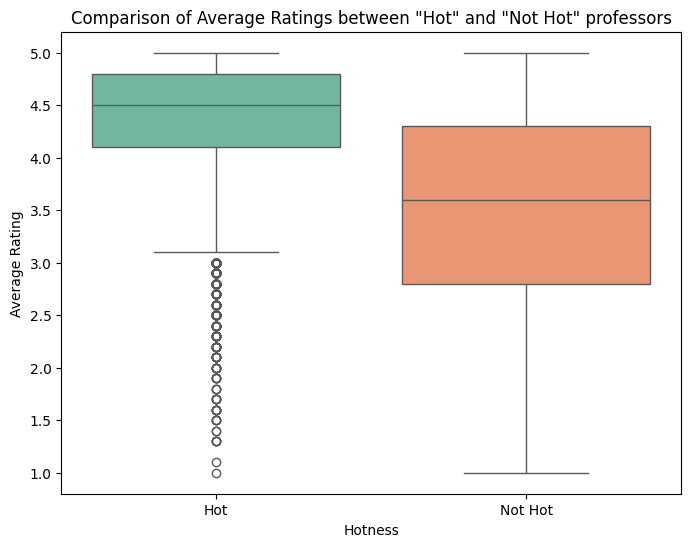

In [13]:
hot_ratings = merge_data[merge_data['Received Pepper'] == 1]['Average Rating']
not_hot_ratings = merge_data[merge_data['Received Pepper'] == 0]['Average Rating']

#calc means
hot_mean = hot_ratings.mean()
not_hot_mean = not_hot_ratings.mean()

#independent t-test
t_stat2, p_val3 = stats.ttest_ind(hot_ratings, not_hot_ratings, nan_policy='omit', equal_var=False)

print(f'Average Rating for Hot Teachers: {round(hot_mean,2)}')
print(f"Average Rating for Teachers who aren't Hot': {round(not_hot_mean,2)}")
print(f'T-statistic: {round(t_stat2,2)}')
print(f'P-value: {round(p_val3,2)}')

if p_val3 < 0.005:
    print("There's a statistically significant difference in ratings between hot and not hot teachers")
else:    
    print("There is no statistically significant difference in ratings between hot and not hot teachers")

#new col to label groups
merge_data['Hotness'] = merge_data['Received Pepper'].map({1:'Hot', 0:'Not Hot'})

#boxplot to compare ratings between 'hot' and 'not hot' professors
plt.figure(figsize=(8,6))
sns.boxplot(x='Hotness', y='Average Rating', data=merge_data, palette='Set2')
plt.title('Comparison of Average Ratings between "Hot" and "Not Hot" professors')
plt.xlabel('Hotness')
plt.ylabel('Average Rating')
plt.show()

### **7. Regression model predicting Average Rating from Difficulty (only)**
- **Findings**:
  - **Negative coefficient (β = -0.7271, p < 0.005)**.
  - **R² = 0.383**, meaning **38.3% of rating variance is explained by difficulty**.
  - **RMSE = 0.74**, indicating prediction error.


                            OLS Regression Results                            
Dep. Variable:         Average Rating   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:02:39   Log-Likelihood:                -28481.
No. Observations:               25368   AIC:                         5.697e+04
Df Residuals:                   25366   BIC:                         5.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.9692      0

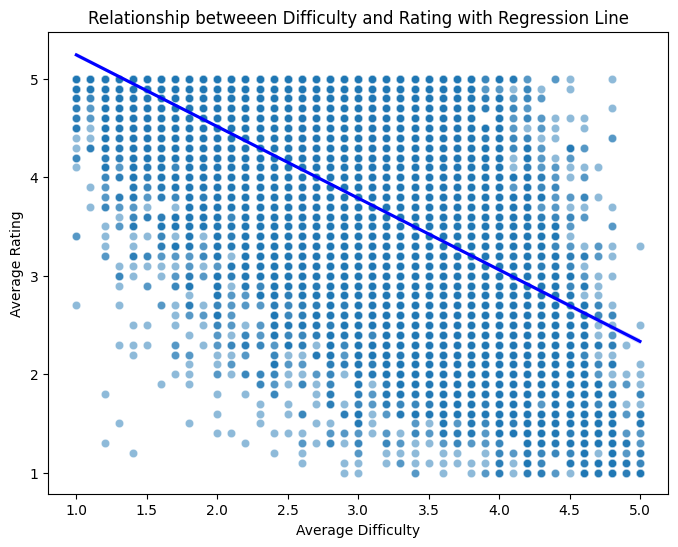

In [16]:
from sklearn.metrics import mean_squared_error

difficulty_model = merge_data.dropna(subset=['Average Rating','Average Difficulty'])

X_3 = difficulty_model['Average Difficulty']
y_3 = difficulty_model['Average Rating']

X_3 = sm.add_constant(X_3)

model_3 = sm.OLS(y_3,X_3).fit()

predictions = model_3.predict(X_3)

#calc r-sq and rmse
r_sq = model_3.rsquared
rmse = np.sqrt(mean_squared_error(y_3, predictions))

print(model_3.summary())
print("\nModel Performance:")
print(f"R-squared: {round(r_sq,2)}")
print(f"RMSE: {round(rmse,2)}")

#scatterplot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x='Average Difficulty', y='Average Rating', data=difficulty_model, alpha=0.5)
sns.regplot(x='Average Difficulty', y='Average Rating', data=difficulty_model, scatter=False, color='blue')
plt.title('Relationship betweeen Difficulty and Rating with Regression Line')
plt.xlabel('Average Difficulty')
plt.ylabel('Average Rating')
plt.show()

### **8. Regression model predicting Average Rating from all factors**
- **Findings**:
  - **R² = 0.798**, significantly better than single-variable model.
  - **RMSE = 0.38**, improving prediction accuracy.
  - **Key Predictors**:
    - **Proportion Retake (β = 0.0266, p < 0.005)** - Strongest positive effect.
    - **Average Difficulty (β = -0.203, p < 0.005)** - Still negative, but smaller effect.
  - **Variance Inflation Factor (VIF < 2)** ensured **no multicollinearity**.


                            OLS Regression Results                            
Dep. Variable:         Average Rating   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     8028.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:03:17   Log-Likelihood:                -5483.0
No. Observations:               12160   AIC:                         1.098e+04
Df Residuals:                   12153   BIC:                         1.103e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4652      0

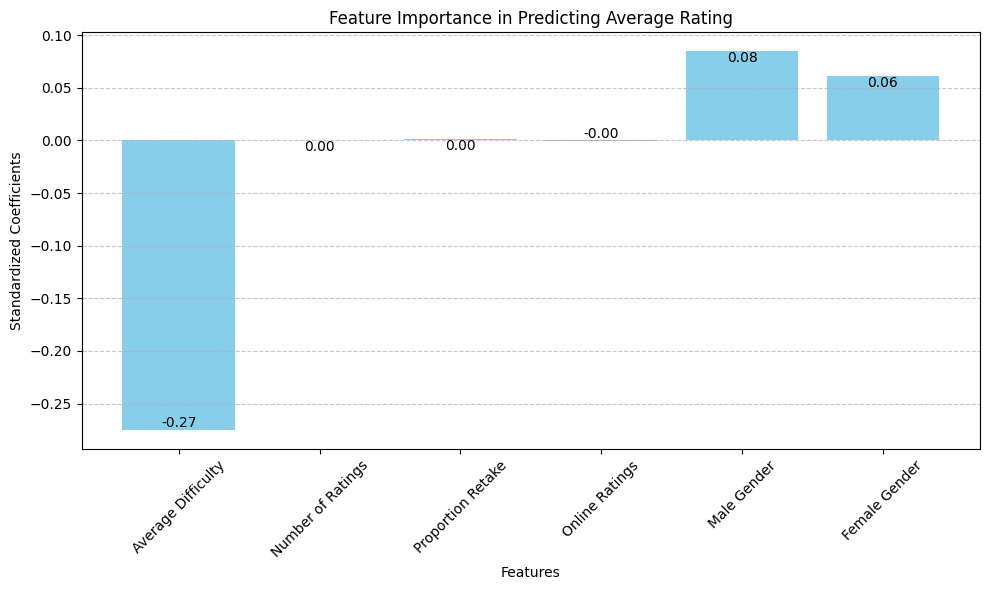

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#drop rows 
data_all_factors = merge_data.dropna(subset=["Average Rating", "Average Difficulty", "Number of Ratings", "Proportion Retake", "Online Ratings", "Male Gender", "Female Gender"])

X_4 = data_all_factors[["Average Difficulty", "Number of Ratings", "Proportion Retake", "Online Ratings", "Male Gender", "Female Gender"]]
y_4 = data_all_factors["Average Rating"]

X_4 = sm.add_constant(X_4)

model_4 = sm.OLS(y_4,X_4).fit()

predictions_2 = model_4.predict(X_4)

r_sq2 = model_4.rsquared
rmse2 = np.sqrt(mean_squared_error(y_4, predictions_2))

#variance inflation factor (VIF) for multicollinearity
vif_data = pd.DataFrame()
vif_data['Variable'] = X_4.columns
vif_data['VIF'] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]

print(model_4.summary())
print("\nModel Performance:")
print(f"R-squared: {r_sq2}")
print(f"RMSE: {rmse2}")

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

#compare 'difficulty only' model 
difficulty_model_rsq = r_sq
difficulty_model_rmse = rmse

print("\nComparison with 'Difficulty-Only' Model:")
print(f"R-squared Improvement: {r_sq2 - difficulty_model_rsq}")
print(f"RMSE Improvement: {difficulty_model_rmse - rmse2}")

#extract and standardize coefficients (excluding intercept)
coefficients = model_4.params[1:]
features = X_4.columns[1:]
standardized_coefficients = coefficients / np.std(X_4.iloc[:, 1:], axis=0)

#plot feature importance
plt.figure(figsize=(10,6))
bars = plt.bar(features, standardized_coefficients, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text
        height,  # Position above the bar
        f"{height:.2f}",  # Format the text with two decimals
        ha="center",  # Align horizontally
        va="bottom" if height < 0 else "top",  # Adjust vertical alignment
        fontsize=10
    )

plt.title("Feature Importance in Predicting Average Rating")
plt.xlabel("Features")
plt.ylabel("Standardized Coefficients")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  
plt.show()

### **9. Classification Model: Predicting "pepper" icon from Average Rating**
- **Findings**:
  - **AU(ROC) = 0.78**, indicating strong predictive performance.
  - **Balanced precision & recall** after **upsampling** to fix class imbalance.
  - **ROC Curve visualization** showed strong classification ability.


AU(ROC): 0.78


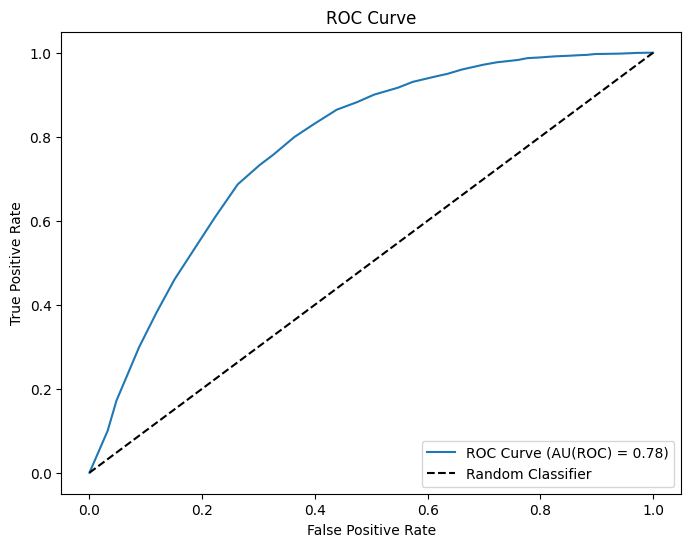

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69      2942
         1.0       0.69      0.80      0.74      2942

    accuracy                           0.72      5884
   macro avg       0.72      0.72      0.72      5884
weighted avg       0.72      0.72      0.72      5884



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.utils import resample

#pre-processing
data_classification = merge_data.dropna(subset=['Average Rating','Received Pepper'])

#address class imbalance by upsampling the minority class 
pepper_yes = data_classification[data_classification['Received Pepper'] == 1]
pepper_no = data_classification[data_classification['Received Pepper'] == 0]

#upsample minority class
pepper_yes_upsampled = resample(pepper_yes, replace=True, n_samples=len(pepper_no), random_state=42)

#combine balanced class
data_balanced = pd.concat([pepper_no, pepper_yes_upsampled])

X_5 = data_balanced[['Average Rating']]
y_5 = data_balanced['Received Pepper']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.2, random_state=42, stratify=y_5)

model_5 = LogisticRegression()
model_5.fit(X_train, y_train)

y_pred_prob =   model_5.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'AU(ROC): {round(roc_auc,2)}')

#generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AU(ROC) = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--',label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

y_pred = model_5.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred))

### **10. Classification Model: Predicting "pepper" from all available factors**
- **Findings**:
  - **AU(ROC) = 0.79**, only a slight improvement over rating-only model.
  - **Average Rating remained the strongest predictor**.

AU(ROC) for all factors model: 0.78


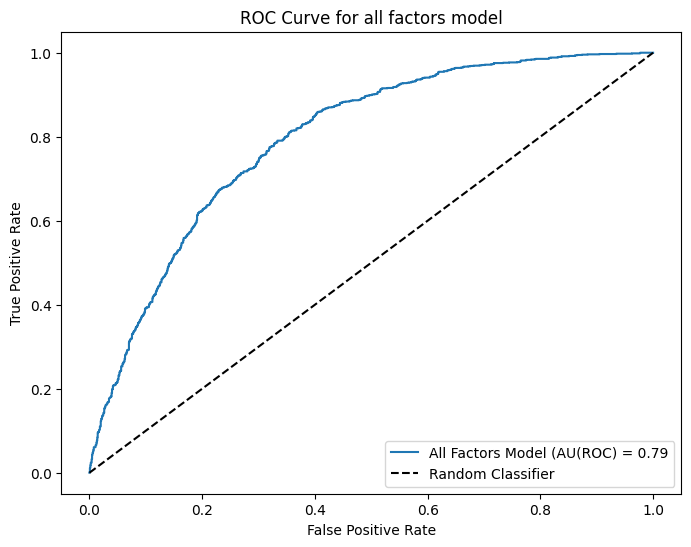

Classification Report for All Factors Model:
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.70      1299
         1.0       0.70      0.79      0.74      1299

    accuracy                           0.72      2598
   macro avg       0.73      0.72      0.72      2598
weighted avg       0.73      0.72      0.72      2598


Comparison with 'Average Rating Only' Model:
AU(ROC) Improvement: 0.017180302940981163


In [19]:
data_classification_all = merge_data.dropna(subset=["Average Rating", "Average Difficulty", "Number of Ratings", "Proportion Retake", "Online Ratings", "Male Gender", "Female Gender", "Received Pepper"])

pepper_yes_all = data_classification_all[data_classification_all['Received Pepper'] == 1]
pepper_no_all = data_classification_all[data_classification_all['Received Pepper'] == 0]

pepper_yes_upsampled_all = resample(pepper_yes_all, replace=True, n_samples=len(pepper_no_all), random_state=42)


data_balanced_all = pd.concat([pepper_no_all, pepper_yes_upsampled_all])

X_all = data_balanced_all[["Average Rating", "Average Difficulty", "Number of Ratings", "Proportion Retake", "Online Ratings", "Male Gender", "Female Gender"]]
y_all = data_balanced_all["Received Pepper"]

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)

model_all = LogisticRegression(max_iter=1000)
model_all.fit(X_train_all, y_train_all)

y_pred_prob_all = model_all.predict_proba(X_test_all)[:, 1]

roc_auc_all = roc_auc_score(y_test_all, y_pred_prob_all)
print(f'AU(ROC) for all factors model: {round(roc_auc,2)}')

#generate ROC Curve
fpr_all, tpr_all, thresholds_all = roc_curve(y_test_all, y_pred_prob_all)
plt.figure(figsize=(8,6))
plt.plot(fpr_all, tpr_all, label=f"All Factors Model (AU(ROC) = {roc_auc_all:.2f}")
plt.plot([0,1],[0,1],'k--',label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all factors model')
plt.legend(loc='lower right')
plt.show()

y_pred_all = model_all.predict(X_test_all)
print('Classification Report for All Factors Model:')
print(classification_report(y_test_all, y_pred_all))

#compare to average rating only model
roc_auc_rating = roc_auc
print("\nComparison with 'Average Rating Only' Model:")
print(f"AU(ROC) Improvement: {roc_auc_all - roc_auc_rating}")

## **Extra Credit: Exploring Ratings by Field of Study**
- **Methodology**:
  - Linked university data to most common major.
  - Calculated **average professor rating per field of study**.
  - Identified **top 10 and bottom 10 disciplines**.
- **Findings**:
  - **Lowest-rated fields:** Pharmacy, Occupational Safety, Foundations.
  - **Highest-rated fields:** Counselor Education, Graphic Design, Speech.
  - **Bar plot visualization** showed stark differences between disciplines.

/var/folders/z9/gd2kj3_13tq2_s6ytqlgq2n40000gp/T/ipykernel_34789/2175125605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


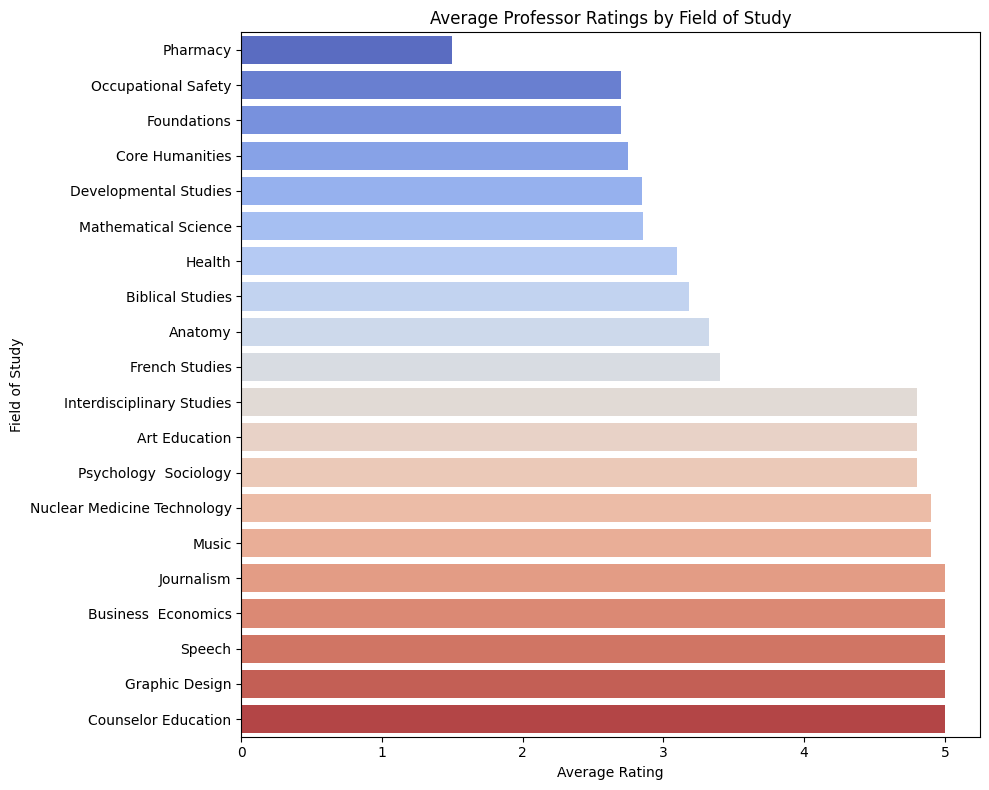

In [20]:
#link avg ratings w most common major for each university
uni_data = merge_data.groupby('University').agg({
    'Average Rating': 'mean',
    'Major/Field': lambda x: x.mode()[0]
}).reset_index()

#group by fields and calc avg prof ratings
field_ratings = uni_data.groupby('Major/Field')['Average Rating'].mean().sort_values()


#limit to top 10 and bottom 10
top_bottom_fields = pd.concat([field_ratings.head(10), field_ratings.tail(10)])

plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_bottom_fields.values,
    y=top_bottom_fields.index,
    palette='coolwarm'
)
plt.title('Average Professor Ratings by Field of Study')
plt.xlabel('Average Rating')
plt.ylabel('Field of Study')
plt.tight_layout()
plt.show()


## **Conclusion**
This project provided key insights into professor ratings on **RateMyProfessors.com**, identifying statistical biases and key predictive factors. Findings suggest:
- **Gender Bias Exists**, though small.
- **Experience has minimal impact on ratings**.
- **Difficulty negatively impacts ratings**.
- **Online professors receive lower ratings**.
- **Professors with higher Retake Likelihood get higher ratings**.
- **Physical attractiveness significantly influences ratings**.

**Future Work:**
- **Sentiment analysis** of qualitative reviews.
- **Machine learning models (e.g., decision trees, neural networks)** for improved prediction.
- **Expanding dataset** to more universities for better generalizability.